In [2]:
#Imported some basic libraries so as to be manipulate the data also scrap date from the yahoo finance platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

In [3]:
#Define starting and ending point of dataset. the bigger the better
yf.pdr_override()
y_symbol = ['AAPL']
startdate = '2010-01-01'
enddate = '2023-1-10'
data = pdr.get_data_yahoo(y_symbol, start=startdate, end=enddate)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515212,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453413,447610800


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,125.070000,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,126.360001,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,125.019997,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.619995,87686600
2023-01-09,130.470001,133.410004,129.889999,130.149994,130.149994,70675200


In [5]:
data=data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515212,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453413,447610800


In [6]:
#cleaned the data by removing the columns I would not need.
data = data.drop(['Date','Adj Close'], axis = 1)
data.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


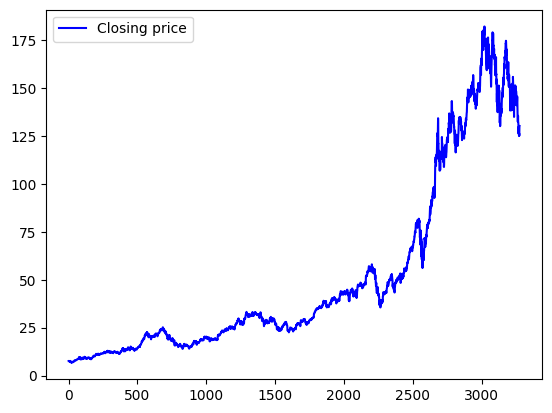

In [7]:
plt.plot(data.Close,'b',label='Closing price')
plt.legend()
plt.show()

In [8]:
data

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3272,130.279999,130.899994,124.169998,125.070000,112117500
3273,126.889999,128.660004,125.080002,126.360001,89113600
3274,127.129997,127.769997,124.760002,125.019997,80962700
3275,126.010002,130.289993,124.889999,129.619995,87686600


In [9]:
#to get the mean of the previous 100 closing values continuously
ma100=data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3272    148.620499
3273    148.199199
3274    147.728399
3275    147.292699
3276    146.863899
Name: Close, Length: 3277, dtype: float64

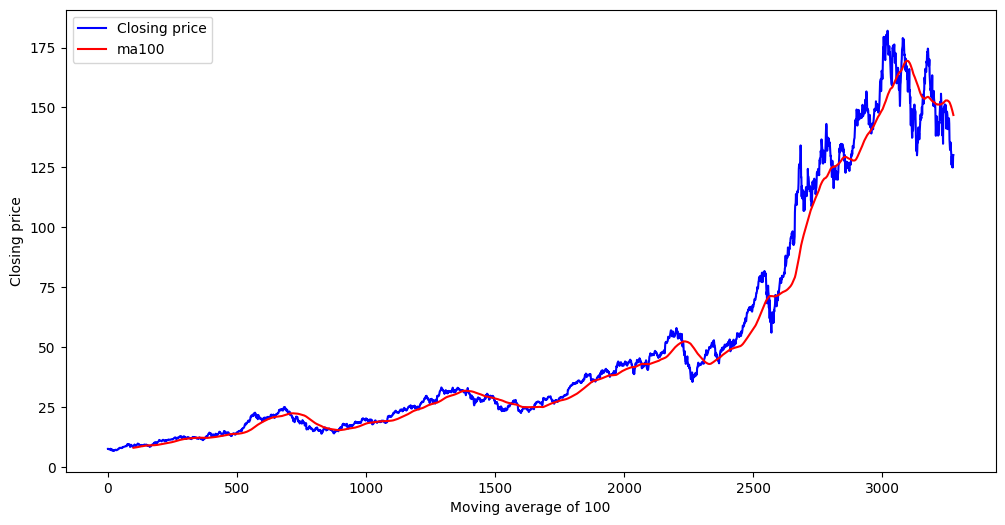

In [10]:
plt.figure(figsize = (12,6))
plt.plot(data.Close,'b',label='Closing price')
plt.plot(ma100,'r', label='ma100')
plt.ylabel('Closing price')
plt.xlabel('Moving average of 100')
plt.legend()
plt.show()

In [11]:
ma200=data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3272    151.43325
3273    151.24515
3274    151.04335
3275    150.84735
3276    150.64705
Name: Close, Length: 3277, dtype: float64

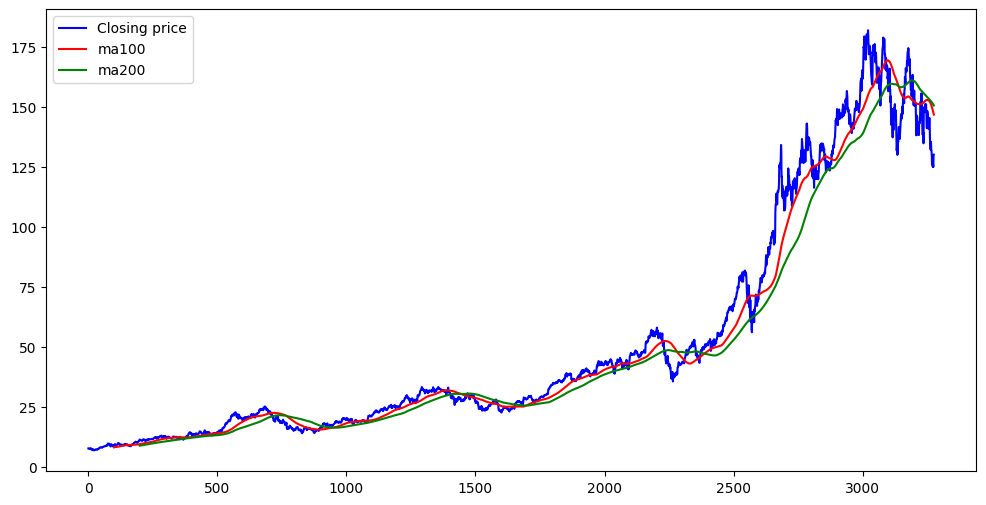

In [12]:
plt.figure(figsize = (12,6))
plt.plot(data.Close,'b',label='Closing price')
plt.plot(ma100,'r', label='ma100')
plt.plot(ma200,'g', label='ma200')
plt.legend()
plt.show()

In [13]:
data.shape

(3277, 5)

In [14]:
#splitting data into training and testing set
data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing=pd.DataFrame(data['Close'][int(len(data)*0.70):int(len(data))])

In [15]:
print(data_training.shape)
print(data_testing.shape)

(2293, 1)
(984, 1)


In [16]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [17]:
data_testing.head()

,Close
2293,42.544998
2294,42.700001
2295,42.605000
2296,42.732498
2297,43.007500


In [18]:
#The training data was then scaled down using the minmaxscaler to values between 0 and 1. 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [19]:
#Assigned the scaled down data to this variable
data_training_array =scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.69868196],
       [0.69389287],
       [0.70102759]])

In [20]:
data_training_array.shape

(2293, 1)

In [21]:
# The previous 100 days are x_train while the next day to be predicted is the y_train.
#This will go on iteratively for every 100 days in the dataset.
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
#convert to numpy array so as to be able to provide this data to our LSTM algorithm
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(2193, 100, 1)

In [23]:
#Creating the ML model
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [24]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [25]:
#Summary of the LSTM model created
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
#compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train,epochs=50)

Epoch 1/50
69/69 [==============================] - 44s 478ms/step - loss: 0.0283
Epoch 2/50
69/69 [==============================] - 31s 447ms/step - loss: 0.0064
Epoch 3/50
69/69 [==============================] - 34s 488ms/step - loss: 0.0055
Epoch 4/50
69/69 [==============================] - 32s 469ms/step - loss: 0.0054
Epoch 5/50
69/69 [==============================] - 31s 453ms/step - loss: 0.0052
Epoch 6/50
69/69 [==============================] - 30s 431ms/step - loss: 0.0049
Epoch 7/50
69/69 [==============================] - 30s 435ms/step - loss: 0.0047
Epoch 8/50
69/69 [==============================] - 32s 458ms/step - loss: 0.0041
Epoch 9/50
69/69 [==============================] - 32s 459ms/step - loss: 0.0041
Epoch 10/50
69/69 [==============================] - 31s 449ms/step - loss: 0.0039
Epoch 11/50
69/69 [==============================] - 35s 511ms/step - loss: 0.0037
Epoch 12/50
69/69 [==============================] - 43s 628ms/step - loss: 0.0039
Epoch 13/50
6

In [30]:
#SAVING MODEL SO THAT WE CAN USE IT WITH STREAM LIT
model.save('keras_model.h5')

In [31]:
data_testing.head()

,Close
2293,42.544998
2294,42.700001
2295,42.605000
2296,42.732498
2297,43.007500


In [32]:
data_training.tail(100)

,Close
2193,54.592499
2194,55.007500
2195,54.415001
2196,55.197498
2197,55.547501
...,...
2288,43.560001
2289,42.735001
2290,42.602501
2291,42.357498


In [33]:
#TESTING
#have to fetch the previous 100 days date from training data to use it to predict the next value
past_100_days = data_training.tail(100)

In [34]:
#appended/conected the previous 100 days data with the testing data
final_data=past_100_days.append(data_testing, ignore_index=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12528\2203863763.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data=past_100_days.append(data_testing, ignore_index=True)


In [35]:
final_data.head()

,Close
0,54.592499
1,55.007500
2,54.415001
3,55.197498
4,55.547501


In [36]:
#scaling data down
input_data=scaler.fit_transform(final_data)
input_data

array([[0.13003328],
       [0.13286677],
       [0.12882138],
       ...,
       [0.61089016],
       [0.64229751],
       [0.64591617]])

In [37]:
input_data.shape

(1084, 1)

In [38]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [39]:
x_test, y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(984, 100, 1)
(984,)


In [40]:
#making predictions
y_predicted=model.predict(x_test)


31/31 [==============================] - 5s 134ms/step


In [41]:
y_predicted.shape

(984, 1)

In [42]:
y_test

array([0.04777672, 0.04883503, 0.04818639, 0.04905691, 0.05093454,
       0.04927882, 0.05253905, 0.05468976, 0.05486046, 0.05578219,
       0.05284628, 0.05595289, 0.05745499, 0.05690876, 0.05518478,
       0.05173679, 0.05243663, 0.06266108, 0.06609201, 0.06745755,
       0.07090551, 0.07498506, 0.07822822, 0.0756849 , 0.07846719,
       0.09029614, 0.08340019, 0.07945721, 0.07612869, 0.07899633,
       0.07942306, 0.08152257, 0.08372451, 0.08846975, 0.09073996,
       0.09132031, 0.09355637, 0.09884784, 0.09782367, 0.09973542,
       0.09688486, 0.09674831, 0.0973628 , 0.09739694, 0.10401981,
       0.10526585, 0.10640949, 0.1114449 , 0.1108987 , 0.10768968,
       0.1060169 , 0.10654605, 0.09982077, 0.11663396, 0.11429546,
       0.11873346, 0.11315182, 0.10355893, 0.1036272 , 0.09990612,
       0.0938636 , 0.0743023 , 0.07932065, 0.08317828, 0.08174448,
       0.079901  , 0.06981308, 0.0758044 , 0.06928394, 0.06395836,
       0.06278058, 0.06151744, 0.06006658, 0.06163694, 0.05612

In [43]:
y_predicted

array([[0.16103825],
       [0.16262236],
       [0.1640465 ],
       [0.16527411],
       [0.16629376],
       [0.16711968],
       [0.16777003],
       [0.16828245],
       [0.16870637],
       [0.16908593],
       [0.16945873],
       [0.16983476],
       [0.17022714],
       [0.17064919],
       [0.17110303],
       [0.17157395],
       [0.17202625],
       [0.1724302 ],
       [0.17281412],
       [0.17322883],
       [0.17372124],
       [0.17433518],
       [0.175111  ],
       [0.17607808],
       [0.17722419],
       [0.17852488],
       [0.17999779],
       [0.1816116 ],
       [0.18329227],
       [0.18494368],
       [0.18649149],
       [0.18788297],
       [0.1890952 ],
       [0.19013393],
       [0.19104008],
       [0.19186848],
       [0.19266726],
       [0.1934798 ],
       [0.19435805],
       [0.19532701],
       [0.19639681],
       [0.19754241],
       [0.19872285],
       [0.19989549],
       [0.20102061],
       [0.20209852],
       [0.20314148],
       [0.204

In [44]:
#GETTING THE VALUE USED TO SCALE DOWN
scaler.scale_

array([0.00682769])

In [45]:
scale_factor = 1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

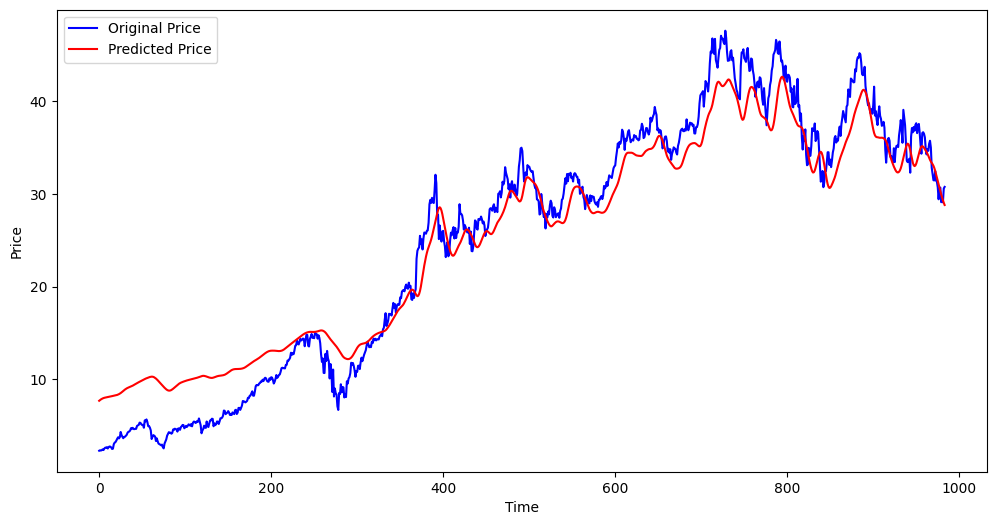

In [46]:
#plotting the prediction
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()